<a href="https://colab.research.google.com/github/Ferrari7437/Planetary_Science/blob/main/Project_3_actual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
from PIL import Image

Before we begin, we first make a function to estimate $\log(NF\lambda/5000~Å)$ from an inputted $\log(W/\lambda)$ via the given curve of growth. We do this because I was too annoyed to estimate by hand, and it was an interesting coding challenge.

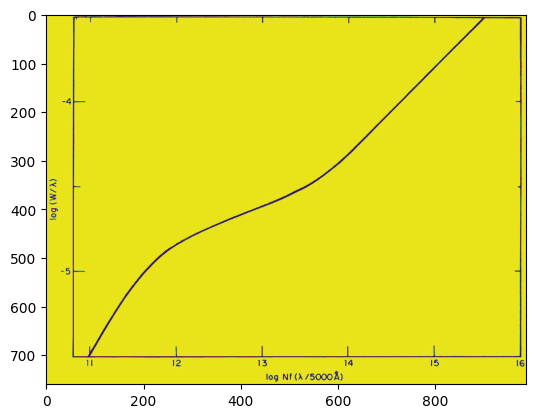

In [ ]:
# Use the given plot for the Curve of Growth
img = np.asarray(Image.open("Solar Curve of Growth.png").convert("L"))
plt.imshow(img)
plt.show()

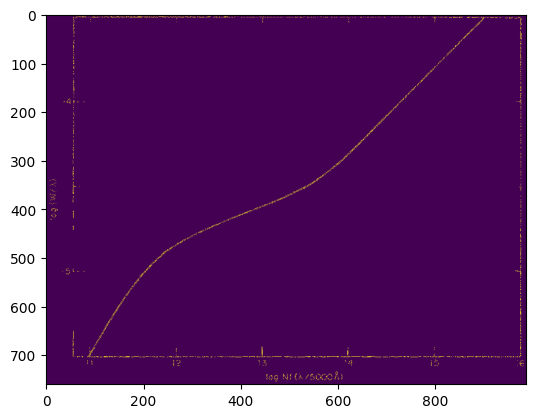

In [ ]:
# Find all values with black pixels
mask = np.where(img == 0,np.ones(np.shape(img)),np.zeros(np.shape(img)))
plt.imshow(mask)

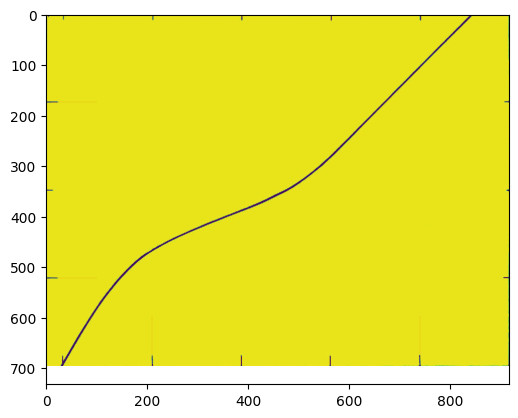

In [ ]:
# Crop image to just the plot part of the image (Note: image seems to be not exactly square, but its probably close enough)
cimg = img[6:703,57:974]
plt.imshow(cimg)
cmask = mask[6:703,57:974]
# Guess where reference ticks are, plot to check and adjust (somewhat imprecise, went pixel by pixel)
plt.hlines(173, 0, 100, color="red",alpha = .5,linewidth = 0.1)
plt.hlines(522, 0, 100, color="red",alpha = .5,linewidth = 0.1)
plt.vlines(210, 597, 697, color="red",alpha = .5,linewidth = 0.1)
plt.vlines(740, 597, 697, color="red",alpha = .5,linewidth = 0.1)

In [ ]:
def find_curve_val(n):
  '''
  Finds the aprroximate value for log(Nflambda/5000 Å) based on the inputted log(W/lambda) and the given graph
  '''
  yi = round(-379*n-1343)                   # linear equation for to scale the value of log(W/lambda) to a column index in the image
  xi = np.median(np.argwhere(cmask[yi]))    # find median black pixel in that row of the image
  val = (3*xi+5730)/530                     # linear equation for to scale the value of the row index to log(Nflambda/5000 Å)
  return val

In [ ]:
find_curve_val(-3.85) # test value, guessed at 14.8 in the given example, answer seems to be within error

np.float64(14.920754716981133)

In [ ]:
for i in np.linspace(-3.6,-5.3,31):
  print(i,find_curve_val(i))
# test values, note that its probably a bit unreliable near the top and bottom due to the tick marks, and may give a nan if no row contains a black pixel. It seems to increase at a reasonable pace
# Seems reliable above -3.65, so round values to there if need be

-3.6 13.14056603773585
-3.6566666666666667 15.345283018867924
-3.7133333333333334 15.226415094339623
-3.77 15.10754716981132
-3.8266666666666667 14.988679245283018
-3.8833333333333333 14.861320754716981
-3.94 14.739622641509435
-3.9966666666666666 12.718867924528302
-4.053333333333334 14.49622641509434
-4.11 14.371698113207547
-4.166666666666667 nan
-4.223333333333334 14.139622641509433
-4.28 14.00377358490566
-4.336666666666667 13.876415094339622
-4.3933333333333335 13.726415094339623
-4.45 13.55377358490566
-4.506666666666667 13.30754716981132
-4.5633333333333335 13.018867924528301
-4.62 12.727358490566038
-4.676666666666667 12.421698113207547
-4.733333333333333 12.175471698113208
-4.79 11.954716981132075
-4.846666666666667 11.80188679245283
-4.903333333333333 11.683018867924527
-4.96 11.564150943396227
-5.016666666666667 11.473584905660378
-5.073333333333333 11.383018867924529
-5.13 11.306603773584905
-5.1866666666666665 11.224528301886792
-5.243333333333333 11.156603773584905
-5.3 

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Now the actual project.

In [ ]:
spec = astropy.io.ascii.read("solar_spectrum.txt") # read in the spectra
wls = spec["col1"]
flux = spec["col2"]

In [ ]:
def equivalent_width(flux, wls, range):
  '''
  Calculates the equivalent width given a flux, wavelength, and range.

  inputs: flux - list - a list of the normalized fluxes in the spectrum.
          wls - list - a list of the wavelengths in the spectrum that match each flux.
          range - tuple - a tuple (or list) containing the low and boundaries to calculate the EW within.
  '''
  ind = np.where((wls > range[0])&(wls < range[1])) # find the indices of all wavelengths withing the range
  step = np.median(np.diff(wls[ind]))               # find the median step between each wavelength
  ew = np.sum((1 - flux[ind]))*step                 # sum over one minus the normalized flux at each wavelength, multiplied by the median step
  return ew

Text(0, 0.5, 'Normalized Flux')

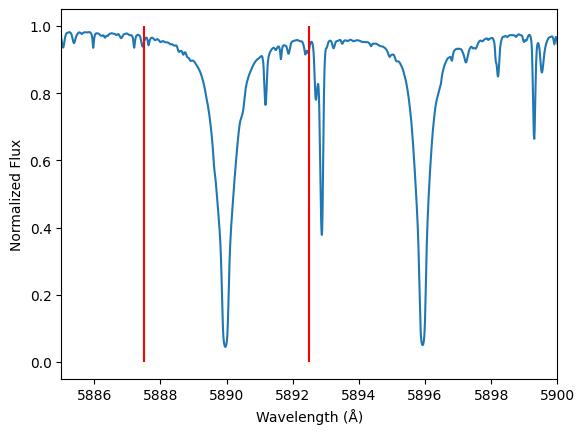

In [ ]:
plt.plot(wls,flux / 1e4)
plt.vlines(5887.5, 0, 1, color="red")
plt.vlines(5892.5, 0, 1, color="red")
plt.xlim(5885, 5900)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Flux")

In [ ]:
f = .65
ew_na = equivalent_width(flux/1e4, wls, (5887.5, 5892.5))
yv_na = np.log10(ew_na/5890)
Nf_na = find_curve_val(yv_na)
N1_na = (10**(Nf_na))/f *(5000/5890)
print('sodium equivalent width:',ew_na)
print('sodium log(W/lambda):',yv_na)
print('sodium log(Nflambda/5000 Å):',Nf_na)
print('sodium N:',N1_na)

sodium equivalent width: 0.8346720000182191
sodium log(W/lambda): -3.8485994499231455
sodium log(Nflambda/5000 Å): 14.920754716981133
sodium N: 1088168299480778.5


In [ ]:
def Boltzmann_ratio(E1,E2,g1,g2):
  k = 8.6173303e-5 # Boltzmann constant in ev/K
  T = 5772         # effective temperature of the sun
  return g2/g1 * np.exp((E1-E2)/(k*T))

In [ ]:
N2_N1_na = Boltzmann_ratio(-5.14,-3.04,2,6)
print('sodium N2/N1:',N2_N1_na)

sodium N2/N1: 0.044006972565924216


In [ ]:
def Saha_ratio(E,Z1,Z2):
  E = 1.60218e-19 * E # convert to J
  k = 1.380649e-23    # Boltzmann constant in J/K
  T = 5772            # effective temperature of the sun
  m = 9.1093837e-31   # election mass in kg
  h = 6.62607015e-34  # Planck constant in J s
  n = 1.25e19         # number density of electrons
  return (2/n) * (2*np.pi*m*k*T/(h**2))**(3/2) * (Z2/Z1) * np.exp(-E/(k*T))

In [ ]:
Na2_Na1 = Saha_ratio(5.1,2.4,1)
print('sodium Na2/Na1:',Na2_Na1)

sodium Na2/Na1: 2487.267743563732


In [ ]:
Nt_na = N1_na * (1+N2_N1_na) * (1+Na2_Na1)
print('sodium total:',Nt_na)

sodium total: 2.826809737946518e+18


In [ ]:
a_na = 12 + np.log10(Nt_na/6.6e23)
print('sodium abundance:',a_na)

sodium abundance: 6.631752643184428


In [ ]:
# Extra Credit Parts
# Source for spectra: https://bass2000.obspm.fr/solar_spect.php
# Source for the exitation energies and degeneracy numbers: https://physics.nist.gov/PhysRefData/Handbook/Tables/magnesiumtable5.htm (and equivalents for other atoms)
# Source for the partition states of Na, Mg, Si: https://iopscience.iop.org/article/10.1088/0004-637X/711/1/239/pdf. Fe: https://acta.astrouw.edu.pl/Vol52/n2/pap_52_2_7.pdf
# I redid sodium for the comparison of the partition states, as I was having trouble finding them online as I didn't really know if they were reliable. The answer was fairly close, and closer to real value than the original

In [2]:
def eV_from_invcm(invcm):
  return invcm/8065.544 # this unit conversion is needed for the source I used, it is the energy of a photon based on its wave number (inverse wavelength in cm^-1)

In [ ]:
Na2_Na1 = Saha_ratio(5.1,836,268)
print('adjusted partition sodium Na2/Na1:',Na2_Na1)

adjusted partition sodium Na2/Na1: 1913.6490582059719


In [ ]:
Nt_na = N1_na * (1+N2_N1_na) * (1+Na2_Na1)
print('adjusted partition sodium total:',Nt_na)

adjusted partition sodium total: 2.1751471948654246e+18


In [ ]:
a_na = 12 + np.log10(Nt_na/6.6e23)
print('adjusted partition sodium abundance:',a_na)  # accepted value is 6.30, this is pretty close

adjusted partition sodium abundance: 6.517944715980878


In [ ]:
spec = astropy.io.ascii.read("Mg_b1.php") # read in the spectra
wls_mg = spec["Wavelength (Angstroms)"]
flux_mg = spec["Normalized intensity"]

Text(0, 0.5, 'Normalized Flux')

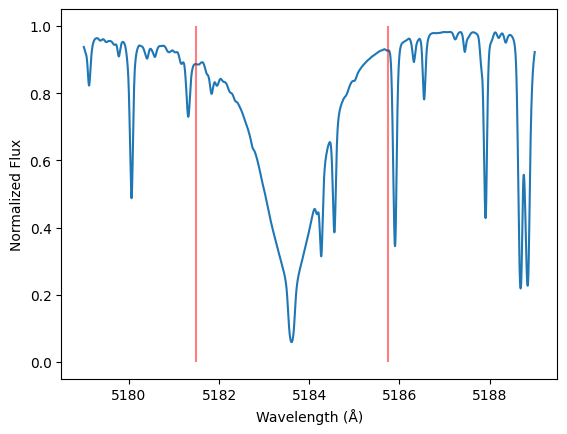

In [ ]:
plt.plot(wls_mg,flux_mg/1e4)
width = 4.25
plt.vlines(5183.62 - width/2, 0, 1, color="red",alpha = .5)
plt.vlines(5183.62 + width/2, 0, 1, color="red",alpha = .5)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Flux")

In [ ]:
f_mg = 1.499e-8 * 0.575 * 5183.62**2 * 5/3                                              # Sourced from https://www.nist.gov/pml/basic-atomic-spectroscopic-data-handbook
ew_mg = equivalent_width(flux_mg/1e4, wls_mg, (5183.62 - width/2, 5183.62 + width/2))
yv_mg = np.log10(ew_mg/5183.62)
Nf_mg = find_curve_val(yv_mg)
N1_mg = (10**(Nf_mg))/f_mg *(5000/5183.62)
print('magnesium equivalent width:',ew_mg)
print('magnesium log(W/lambda):',yv_mg)
print('magnesium log(Nflambda/5000 Å):',Nf_mg)
print('magnesium N:',N1_mg)
N2_N1_mg = Boltzmann_ratio(eV_from_invcm(21911.178),eV_from_invcm(41197.403),3,5)
print('magnesiun N2/N1:',N2_N1_mg)
Mg2_Mg1 = Saha_ratio(eV_from_invcm(61671.05),421,252)
print('Mg2/Mg1:',Mg2_Mg1)                                 # this number was a lot lower than I expected, I tried to see if there was a significant fraction of MgIII -
Mg3_Mg2 = Saha_ratio(eV_from_invcm(121267.64),252,531)
print('Mg3/Mg2:',Mg3_Mg2)                                 # - there was not. I add it to the total anyways, because why not
Nt_mg = N1_mg * (1+N2_N1_mg) * (1+Mg2_Mg1*(1 + Mg3_Mg2))
print('magnesium total:',Nt_mg)
a_mg = 12 + np.log10(Nt_mg/6.6e23)
print('magnesiun abundance:',a_mg)         # accepted value is 7.54.
# My answer is four and a half orders of magnitude off. I believe this is because there are other magnesium lines representing other transition states.
# I picked a transition that is relatively rare as my N1 is not the "ground state", which I think lowers it a lot...

magnesium equivalent width: 1.5257178003108296
magnesium log(W/lambda): -3.531158943731009
magnesium log(Nflambda/5000 Å): 12.999056603773585
magnesium N: 24934973467840.492
magnesiun N2/N1: 0.01361448001575563
Mg2/Mg1: 21.370817879689657
Mg3/Mg2: 2.658904340624343e-05
magnesium total: 565424483359482.8
magnesiun abundance: 2.932830674338037


In [5]:
eV_from_invcm(61671.05)


7.646235641390091

In [ ]:
f_mg

0.38599754351116616

In [ ]:
# Correct Magnesium by finding the number of actual ground state atoms
N1_N0_mg = Boltzmann_ratio(eV_from_invcm(0),eV_from_invcm(21911.178),1,3)
print('magnesium N1/N0:',N1_N0_mg)
# Now we find the true number of atoms in the ground state
N0_mg = N1_mg/N1_N0_mg
print('magnesium N0:',N0_mg)
# Now we must change our total abundance equation
Ntt_mg = N0_mg * (1+N1_N0_mg*(1 + N2_N1_mg)) * (1+Mg2_Mg1*(1 + Mg3_Mg2))
print('adjusted magnesium total:',Ntt_mg)
aa_mg = 12 + np.log10(Ntt_mg/6.6e23)
print('adjusted magnesium abundance:',aa_mg)         # accepted value is 7.54.
# This is two orders of magnitude closer. The other states likely also contribute greatly.

magnesium N1/N0: 0.01273816611687268
magnesium N0: 1957501043640199.0
adjusted magnesium total: 4.4357436139980104e+16
adjusted magnesium abundance: 4.82742250043756


In [ ]:
# I was going to do Si, but I don't see any Fraunhofer lines (strong visible lines), so I'll skip it, as I think a weak line would not work well for this method

In [ ]:
spec = astropy.io.ascii.read("Fe_e.php")
wls_fe = spec["Wavelength (Angstroms)"]
flux_fe = spec["Normalized intensity"]

Text(0, 0.5, 'Normalized Flux')

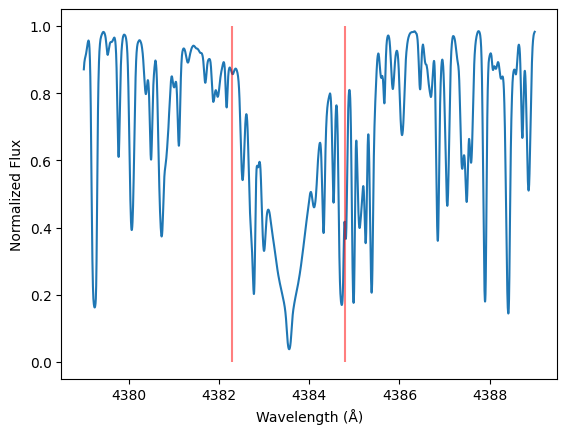

In [ ]:
plt.plot(wls_fe,flux_fe/1e4)
width = 2.5
plt.vlines(4383.5449 - width/2, 0, 1, color="red",alpha = .5)
plt.vlines(4383.5449 + width/2, 0, 1, color="red",alpha = .5)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Flux")

In [ ]:
# Like with magnesium, we now realize that our transition was not to a ground state, so we must adjust our calculations
N1_N0_fe = Boltzmann_ratio(eV_from_invcm(0),eV_from_invcm(11976.238),9,9)
print('iron N1/N0:',N1_N0_fe)
# Now we find the true number of atoms in the ground state
N0_fe = N1_fe/N1_N0_fe
print('iron N0:',N0_fe)
# Now we must change our total abundance equation
Ntt_fe = N0_fe * (1 + N1_N0_fe*(1 + N2_N1_fe)) * (1 + Fe2_Fe1)
print('adjusted iron total:',Ntt_fe)
aa_fe = 12 + np.log10(Ntt_fe/6.6e23)
print('adjusted iron abundance:',aa_fe)         # accepted value is 7.48.
# This is one and a half orders of magnitude closer. The other states likely also contribute.

iron N1/N0: 0.05052444460848796
iron N0: 2.9152381508919354e+17
adjusted iron total: 5.403289482819535e+18
adjusted iron abundance: 6.913114300074933


In [ ]:
f_fe = 1.499e-8 * 0.5 * 4383.5449**2 * 11/9                                              # Sourced from https://www.nist.gov/pml/basic-atomic-spectroscopic-data-handbook
ew_fe = equivalent_width(flux_fe/1e4, wls_fe, (4383.5449 - width/2, 4383.5449 + width/2))
yv_fe = np.log10(ew_fe/4383.5449)     # this is above -3.65, so I'm rounding that to -3.65, as thats roughly the highest my function works. It shouldn't be too different
Nf_fe = find_curve_val(-3.65)
N1_fe = (10**(Nf_fe))/f_fe *(5000/4383.5449)
print('iron equivalent width:',ew_fe)
print('iron log(W/lambda):',yv_fe, 'rounded to -3.65 from the boundary condition of my function')
print('iron log(Nflambda/5000 Å):',Nf_fe)
print('iron N:',N1_fe)
N2_N1_fe = Boltzmann_ratio(eV_from_invcm(11976.238),eV_from_invcm(34782.419),9,11)
print('iron N2/N1:',N2_N1_fe)
Fe2_Fe1 = Saha_ratio(eV_from_invcm(63737),1,.78)
print('Fe2/Fe1:',Fe2_Fe1)
Nt_fe = N1_fe * (1+N2_N1_fe) * (1+Fe2_Fe1)
print('iron total:',Nt_fe)
a_fe = 12 + np.log10(Nt_fe/6.6e23)
print('iron abundance:',a_fe)         # accepted value is 7.48.

iron equivalent width: 1.3799686002811367
iron log(W/lambda): -3.5019562547227827 rounded to -3.65 from the boundary condition of my function
iron log(Nflambda/5000 Å): 15.356603773584906
iron N: 1.4729078847529046e+16
iron N2/N1: 0.00415189605113719
Fe2/Fe1: 16.639705152914477
iron total: 2.6089533959340128e+17
iron abundance: 5.5969223857701325


In [6]:
eV_from_invcm(63737)

7.9023807941535